In [1]:
import pandas
import datetime
import numpy
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
%matplotlib inline

In [2]:
# Some constants
cutOffMLTMLATUniqCnt = 4

In [3]:
velsDataDF = pandas.read_csv( "../data/processed-vels-geomag-fin.txt", sep=' ',\
                            infer_datetime_format=True,\
                            parse_dates=["date"])
# Get actual SAPS azimuths
velsDataDF["azim"] = -90.-velsDataDF["azim"]
velsDataDF.head()
# Filter out some values
# When there aren't good number of measurements at lats
# discard those values
cntMLTPntsDF = velsDataDF[ ["dst_bin", "normMLT", "MLAT"] \
                    ].groupby( ["dst_bin", "normMLT"] \
                    )["MLAT"].nunique().reset_index()
cntMLTPntsDF.columns = ["dst_bin", "normMLT", "MLATCntUnq"]
cntMLTPntsDF = cntMLTPntsDF[ cntMLTPntsDF["MLATCntUnq"] >=\
                    cutOffMLTMLATUniqCnt ][ ["dst_bin", "normMLT"]\
                        ].reset_index(drop=True)
velsDataDF = pandas.merge( velsDataDF, cntMLTPntsDF,\
                    on=["dst_bin", "normMLT"], how="inner" )
velsDataDF["hour"] = velsDataDF["date"].apply(lambda x: x.strftime('%H'))
velsDataDF["minute"] = velsDataDF["date"].apply(lambda x: x.strftime('%M'))
velsDataDF["dtStr"] = velsDataDF["date"].apply(lambda x: x.strftime('%Y%m%d'))

In [4]:
# Asy Inds
asyDF = pandas.read_csv( "../data/Asy_processed.txt", sep=' ' )
asyDF["date"] = pandas.to_datetime(asyDF["datetimeStr"], format='%Y%m%d-%H-%M')
asyDF["hour"] = asyDF["date"].apply(lambda x: x.strftime('%H'))
asyDF["minute"] = asyDF["date"].apply(lambda x: x.strftime('%M'))
asyDF["dtStr"] = asyDF["date"].apply(lambda x: x.strftime('%Y%m%d'))
asyDF.head()

,datetimeStr,AsyD,AsyH,SymD,SymH,date,hour,minute,dtStr
0,20110101-00-00,17.0,13.0,1.0,-10.0,2011-01-01 00:00:00,00,00,20110101
1,20110101-00-01,17.0,13.0,1.0,-10.0,2011-01-01 00:01:00,00,01,20110101
2,20110101-00-02,17.0,13.0,1.0,-10.0,2011-01-01 00:02:00,00,02,20110101
3,20110101-00-03,17.0,13.0,1.0,-10.0,2011-01-01 00:03:00,00,03,20110101
4,20110101-00-04,17.0,13.0,1.0,-10.0,2011-01-01 00:04:00,00,04,20110101


In [5]:
velsDataDF = pandas.merge( velsDataDF, asyDF,\
                         on=["dtStr", "hour", "minute"], how='inner')
velsDataDF = velsDataDF [ ['azim','azimStd', 'delMLT', 'goodFit',\
                      'MLAT', 'normMLT', 'vSaps', 'velSTD',\
                      'endPtMLAT', 'endPtNormMLT', 'date_x','dtStr',\
                      'hour', 'minute', 'dst_date', 'dst_index', 'dst_bin',\
                      'datetimeStr_x', 'AE', 'AL', 'AO', 'AU', 'count', 'maxCount',\
                       'probOcc', 'AsyD', 'AsyH', 'SymD', 'SymH'] ]
velsDataDF.columns = ['azim','azimStd', 'delMLT', 'goodFit',\
                      'MLAT', 'normMLT', 'vSaps', 'velSTD',\
                      'endPtMLAT', 'endPtNormMLT', 'date','dtStr',\
                      'hour', 'minute', 'dst_date', 'dst_index', 'dst_bin',\
                      'datetimeStr', 'AE', 'AL', 'AO', 'AU', 'count', 'maxCount',\
                       'probOcc', 'AsyD', 'AsyH', 'SymD', 'SymH']

In [6]:
# Divide asymH index into bins
asyHBins = [ 0, 30, 60, 90, 180 ]
velsDataDF = pandas.concat( [ velsDataDF, \
                    pandas.cut( velsDataDF["AsyH"], \
                               bins=asyHBins ) ], axis=1 )
velsDataDF.columns = ['azim','azimStd', 'delMLT', 'goodFit',\
                      'MLAT', 'normMLT', 'vSaps', 'velSTD',\
                      'endPtMLAT', 'endPtNormMLT', 'date','dtStr',\
                      'hour', 'minute', 'dst_date', 'dst_index', 'dst_bin',\
                      'datetimeStr', 'AE', 'AL', 'AO', 'AU', 'count', 'maxCount',\
                       'probOcc', 'AsyD', 'AsyH', 'SymD', 'SymH', 'AsyH_bin']
velsDataDF.head()

,azim,azimStd,delMLT,goodFit,MLAT,normMLT,vSaps,velSTD,endPtMLAT,endPtNormMLT,...,AO,AU,count,maxCount,probOcc,AsyD,AsyH,SymD,SymH,AsyH_bin
0,-79.412573,1.794202,0.5,True,62.0,-6.0,306.738497,11.198685,62.06,-6.30,...,-93,157,470,2562,0.183450,44.0,33.0,2.0,-48.0,"(30, 60]"
1,-78.075135,1.005434,0.5,True,61.5,-6.0,296.893207,6.211472,61.56,-6.29,...,-93,157,572,2562,0.223263,44.0,33.0,2.0,-48.0,"(30, 60]"
2,-82.467569,3.532155,0.5,True,60.0,-6.0,220.239731,11.464162,60.03,-6.22,...,-93,157,554,2562,0.216237,44.0,33.0,2.0,-48.0,"(30, 60]"
3,-84.987310,1.491959,0.5,True,60.5,-6.0,233.815511,5.963564,60.52,-6.23,...,-93,157,566,2562,0.220921,44.0,33.0,2.0,-48.0,"(30, 60]"
4,-79.086184,0.914397,0.5,True,62.5,-6.0,343.746070,6.854657,62.57,-6.34,...,-93,157,494,2562,0.192818,44.0,33.0,2.0,-48.0,"(30, 60]"


In [7]:
# Make a few plots of the fitting to get an estimate of how things are!
# Our velocities range from 0 to 2000 m/s
velsBins = numpy.arange(0.,2100.,100.)#/2000.
selMLAT = 59.#59.#
selNormMLT = -4.#-6.#
selVelDF = velsDataDF[ (velsDataDF["normMLT"] == selNormMLT) & \
                  (velsDataDF["MLAT"] == selMLAT) ]

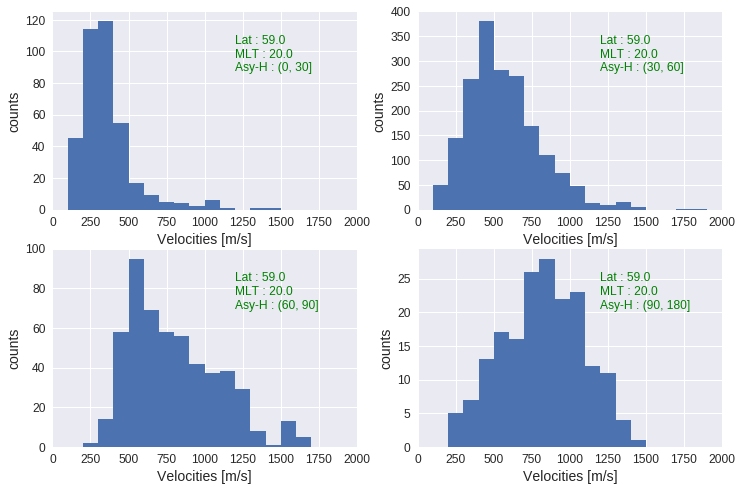

In [8]:
f = plt.figure(figsize=(12, 8))
axArr = []
axArr.append( f.add_subplot(2,2,1) )
axArr.append( f.add_subplot(2,2,2) )
axArr.append( f.add_subplot(2,2,3) ) 
axArr.append( f.add_subplot(2,2,4) )
for ind, currAsyBin in enumerate( sorted(selVelDF["AsyH_bin"].unique()) ):
    subVelDF = selVelDF[ selVelDF["AsyH_bin"] == currAsyBin ]
    velScale = subVelDF["vSaps"].value_counts(bins=velsBins[::2]).max()
#     velKernel = stats.gaussian_kde( subVelDF["vSaps"], bw_method="scott" )
#     kernel_adjusted = (velKernel.pdf( velsBins )/max(velKernel.pdf( velsBins ))) * velScale
#     axArr[ind].plot(velsArr, kernel_adjusted, 'r-', lw=5, alpha=0.6)
#     axArr[ind].plot(velsArr, fitVals, 'b--', lw=5, alpha=0.6)
    axArr[ind].set_xlabel("Velocities [m/s]", fontsize=14)
    axArr[ind].set_ylabel("counts", fontsize=14)
    printText = "Lat : " + str(selMLAT) +\
                "\n" + "MLT : " + str(selNormMLT+24) +\
                "\n" + "Asy-H : " + currAsyBin
    axArr[ind].text(0.6, 0.7,  printText,
            transform=axArr[ind].transAxes,
            color='green', fontsize=12)
    aa = subVelDF["vSaps"].hist(ax=axArr[ind], bins=velsBins)
    axArr[ind].set_xlim( [min(velsBins), max(velsBins)] )
    axArr[ind].tick_params(labelsize=12)
# plt.tick_params(labelsize=20)    
plt.savefig("../figs/velDist-" + str(selMLAT)\
            + str(selNormMLT) + ".pdf",bbox_inches='tight')